In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
filePath = '../Data/heart.csv'

data = pd.read_csv(filePath)

data.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
print("(Rows, columns): " + str(data.shape))
data.columns 

(Rows, columns): (918, 12)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
#Unique values for each variable
data.nunique(axis=0)

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
#Check for missing values
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
#Check if there's a good proportion between the outputs
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [9]:
#Preprocesing
from sklearn import preprocessing
data_proc = data.copy()
oe = preprocessing.OrdinalEncoder()
ord_enc = oe.fit(data[["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]])
data_proc[["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]] = oe.transform(data[["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]])

data_proc.head(30)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0
5,39,1.0,2.0,120,339,0,1.0,170,0.0,0.0,2.0,0
6,45,0.0,1.0,130,237,0,1.0,170,0.0,0.0,2.0,0
7,54,1.0,1.0,110,208,0,1.0,142,0.0,0.0,2.0,0
8,37,1.0,0.0,140,207,0,1.0,130,1.0,1.5,1.0,1
9,48,0.0,1.0,120,284,0,1.0,120,0.0,0.0,2.0,0


In [10]:
#Preprocesing
from sklearn import preprocessing
data_proc = data.copy()
oe = preprocessing.OrdinalEncoder()
ord_enc = oe.fit(data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']])
data_proc[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']] = oe.transform(data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']])

data_proc.head(30)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12.0,1.0,1.0,41.0,147.0,0.0,1.0,98.0,0.0,10.0,2.0,0.0
1,21.0,0.0,2.0,55.0,40.0,0.0,1.0,82.0,0.0,20.0,1.0,1.0
2,9.0,1.0,1.0,31.0,141.0,0.0,2.0,25.0,0.0,10.0,2.0,0.0
3,20.0,0.0,0.0,39.0,72.0,0.0,1.0,34.0,1.0,25.0,1.0,1.0
4,26.0,1.0,2.0,49.0,53.0,0.0,1.0,48.0,0.0,10.0,2.0,0.0
5,11.0,1.0,2.0,22.0,189.0,0.0,1.0,96.0,0.0,10.0,2.0,0.0
6,17.0,0.0,1.0,31.0,95.0,0.0,1.0,96.0,0.0,10.0,2.0,0.0
7,26.0,1.0,1.0,14.0,66.0,0.0,1.0,68.0,0.0,10.0,2.0,0.0
8,9.0,1.0,0.0,41.0,65.0,0.0,1.0,56.0,1.0,25.0,1.0,1.0
9,20.0,0.0,1.0,22.0,142.0,0.0,1.0,46.0,0.0,10.0,2.0,0.0


In [13]:
#assigning data and outputs to X, Y
X = data_proc.iloc[:, :-1].values
y = data_proc.iloc[:, -1].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

In [15]:
#Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[-1.1161998 ,  0.52162923, -0.82452816, ...,  1.23734978,
         1.58632168, -0.65816623],
       [-0.14954853, -1.91707048,  1.24101337, ..., -0.80817891,
        -0.81105954,  1.04887976],
       [ 1.24672552, -1.91707048, -0.82452816, ..., -0.80817891,
         0.14789295, -0.65816623],
       ...,
       [ 1.03191413,  0.52162923, -0.82452816, ...,  1.23734978,
         3.02475041,  1.04887976],
       [-1.54582259,  0.52162923,  0.20824261, ...,  1.23734978,
         0.14789295, -0.65816623],
       [-1.33101119, -1.91707048,  0.20824261, ..., -0.80817891,
        -0.81105954,  1.04887976]])

In [16]:
from sklearn.metrics import classification_report 

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.839782 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.837048 (0.044882) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.837048 (0.044882) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.837048 (0.044882) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837048 (0.044882) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837048 (0.044882) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.837048 (0.044882) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.837048 (0.044882) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.837048 (0.044882) with: {'C': 10, 'penalty'

C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\linear_model\_logistic.py",

In [32]:
model1 = LogisticRegression(C = 1.0, penalty='l2',solver ='liblinear') # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        74
           1       0.92      0.92      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [13]:
x_test[2]

array([-0.25695423,  0.52162923, -0.82452816,  0.57513978,  1.2524147 ,
       -0.54691411,  0.01283012, -0.62463777,  1.23734978,  3.01715849,
       -0.65816623])

In [14]:
y_test[95]

1

In [21]:
model1.predict(x_test[2].reshape(1, -1))[0]

1

In [16]:
import joblib
joblib.dump(model1,'LGModel.pkl')

['LGModel.pkl']

In [16]:
temp={}
temp['Age']=56
temp['Sex']=0
temp['ChestPainType']=2
temp['RestingBP']=120
temp['Cholesterol']=170
temp['FastingBS']=80
temp['RestingECG']=1
temp['MaxHR']=156
temp['ExerciseAngina']=0
temp['Oldpeak']=0.0
temp['ST_Slope']=1

In [17]:
testData = np.array([20,0,0,39,72,0,1,34,1,25,1])

In [35]:
model1.predict(x_test[2].reshape(1, -1))[0]

1

In [38]:
model1.predict_proba(x_test[2].reshape(1, -1))[0][1]*100

95.76625140202698

In [30]:
model1.classes_

array([0, 1], dtype=int64)

In [28]:
testData = pd.DataFrame({'x':temp})

In [31]:
testData.resha

[56, 0, 2, 120, 170, 80, 1, 156, 0, 0.0, 1]

# Ridge Classifer

In [33]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
random_state = range(10)
# define grid search
grid = dict(alpha=alpha,solver=solver,random_state=random_state)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836616 using {'alpha': 0.1, 'random_state': 0, 'solver': 'lsqr'}
0.836166 (0.046277) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'auto'}
0.836166 (0.046277) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'svd'}
0.836166 (0.046277) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'cholesky'}
0.836616 (0.045695) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'lsqr'}
0.836616 (0.045695) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'sparse_cg'}
0.836166 (0.046277) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'sag'}
0.836166 (0.046277) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'saga'}
0.000000 (0.000000) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'lbfgs'}
0.836166 (0.046277) with: {'alpha': 0.1, 'random_state': 1, 'solver': 'auto'}
0.836166 (0.046277) with: {'alpha': 0.1, 'random_state': 1, 'solver': 'svd'}
0.836166 (0.046277) with: {'alpha': 0.1, 'random_state': 1, 'solver': 'cholesky'}
0.836616 (0.045695) with: {'alpha': 0.1, 'random_state': 1

C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3000 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\linear_model\_ridge.py", line 1302, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\linear_model\_ridge.py", line 705, in fit

In [113]:
model2 = RidgeClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87        74
         1.0       0.92      0.91      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



# K-Nearest Neighbors

In [34]:
# define models and parameters
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 25, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.871109 using {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.806670 (0.043128) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.806670 (0.043128) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.848457 (0.040327) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.846193 (0.042000) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.856152 (0.044666) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.857071 (0.047457) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.843928 (0.044069) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.851203 (0.045984) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.848451 (0.044134) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.853017 (0.046064) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.846619 

In [35]:
model3 = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance') # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        74
           1       0.92      0.89      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



# SVM

In [36]:
# define model and parameters
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale','auto']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.863865 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.800358 (0.057395) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.817555 (0.040303) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.763958 (0.049166) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.799895 (0.055076) with: {'C': 50, 'gamma': 'auto', 'kernel': 'poly'}
0.818012 (0.040427) with: {'C': 50, 'gamma': 'auto', 'kernel': 'rbf'}
0.763026 (0.044107) with: {'C': 50, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.815772 (0.051550) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.838961 (0.045881) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.771714 (0.046493) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.815321 (0.051519) with: {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
0.838510 (0.046089) with: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.766691 (0.044861) with: {'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.844804 (0.044050) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'p

In [37]:
model4 = SVC(C=1.0, gamma='scale',kernel= 'rbf',random_state=1) # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



# Decision Tree

In [38]:
# define model and parameters 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = range(2,20,2)
max_features = range(2,20,2)
# define grid search
grid = dict(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833469 using {'criterion': 'entropy', 'max_depth': 6, 'max_features': 10, 'splitter': 'random'}
0.756677 (0.070785) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'splitter': 'best'}
0.710249 (0.082831) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'splitter': 'random'}
0.783913 (0.044964) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'splitter': 'best'}
0.734401 (0.069649) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'splitter': 'random'}
0.782112 (0.043909) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'splitter': 'best'}
0.757108 (0.056117) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'splitter': 'random'}
0.805819 (0.051343) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 8, 'splitter': 'best'}
0.791262 (0.057967) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 8, 'splitter': 'random'}
0.812144 (0.046088) with: {'criterion': 'gini', 'max_depth': 2, 

C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4320 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (

In [39]:
model5 = DecisionTreeClassifier(criterion= 'gini', max_depth= 6, max_features= 8, splitter='random') # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        74
           1       0.92      0.88      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



# Multi-Layer Perceptron

In [125]:
# define model and parameters
model = MLPClassifier()
hidden_layer_sizes = np.arange(10, 12)
activation = ['identity', 'logistic', 'tanh','relu']
solver = ['lbfgs','sgd','adam']
#alpha = 10.0 ** -np.arange(1, 10)
max_iter = range(200,600,50)
random_state = range(4)
# define grid search
grid = dict(activation=activation,hidden_layer_sizes=hidden_layer_sizes,solver=solver,max_iter=max_iter,random_state=random_state)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.862502 using {'activation': 'relu', 'hidden_layer_sizes': 11, 'max_iter': 550, 'random_state': 3, 'solver': 'adam'}
0.829804 (0.045903) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'max_iter': 200, 'random_state': 0, 'solver': 'lbfgs'}
0.839343 (0.042905) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'max_iter': 200, 'random_state': 0, 'solver': 'sgd'}
0.832988 (0.045331) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'max_iter': 200, 'random_state': 0, 'solver': 'adam'}
0.829804 (0.045903) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'max_iter': 200, 'random_state': 1, 'solver': 'lbfgs'}
0.825287 (0.048646) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'max_iter': 200, 'random_state': 1, 'solver': 'sgd'}
0.828008 (0.048394) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'max_iter': 200, 'random_state': 1, 'solver': 'adam'}
0.829804 (0.045903) with: {'activation': 'identity', 'hidden_layer_sizes': 10,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
from sklearn.metrics import classification_report 
from sklearn.neural_network import MLPClassifier

model6 = MLPClassifier(activation= 'relu', hidden_layer_sizes= 11, max_iter= 550, random_state= 3, solver= 'adam') # get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        74
           1       0.91      0.88      0.89       110

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



C:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


# Bagged Decision Trees (Bagging)

In [127]:
from sklearn.ensemble import BaggingClassifier
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.847507 using {'n_estimators': 1000}
0.823442 (0.038873) with: {'n_estimators': 10}
0.841164 (0.032311) with: {'n_estimators': 100}
0.847507 (0.037387) with: {'n_estimators': 1000}


In [128]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import BaggingClassifier

model6 = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 2), random_state=1, max_iter=500) # get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85        74
         1.0       0.90      0.89      0.89       110

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# Random Forest

In [41]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.869283 using {'max_features': 'log2', 'n_estimators': 100}
0.841201 (0.040245) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.865235 (0.037375) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.864778 (0.035738) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.834407 (0.042986) with: {'max_features': 'log2', 'n_estimators': 10}
0.869283 (0.037875) with: {'max_features': 'log2', 'n_estimators': 100}
0.864791 (0.036376) with: {'max_features': 'log2', 'n_estimators': 1000}


In [42]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model7 = RandomForestClassifier() # get instance of model
model7.fit(x_train, y_train) # Train/Fit model 

y_pred7 = model7.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred7)) # output accuracy

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        74
           1       0.91      0.89      0.90       110

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# Stochastic Gradient Boosting

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.871109 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.542244 (0.005192) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.542244 (0.005192) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.542244 (0.005192) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.742552 (0.028163) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.751592 (0.026468) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.779791 (0.034930) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.852474 (0.035226) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.851142 (0.038270) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.846125 (0.034786) with: {'learning_rate': 0.001, '

In [59]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier

model8 = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 1000, subsample= 0.7) # get instance of model
model8.fit(x_train, y_train) # Train/Fit model 

y_pred8 = model8.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred8)) # output accuracy

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        74
           1       0.91      0.90      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



# XGBoost Classifier

In [93]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
# define models and parameters
model = xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
max_depth = range (2, 10, 1)
n_estimators = range(60, 220, 40)
learning_rate = [0.1, 0.01, 0.05]
# define grid search
grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [97]:
model9 = xgb.XGBClassifier(objective ='binary:logistic',eval_metric='auc', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 100,label_encoder=False)
model9.fit(x_train,y_train)
y_pred9 = model9.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred9)) # output accuracy



[23:11:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.88      0.86      0.87        74
           1       0.91      0.92      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [98]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred9))
print("RMSE: %f" % (rmse))

RMSE: 0.321342


In [99]:
#Putting data in DMatrix
feature_names = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
data_dmatrix = xgb.DMatrix(data=X,label=y,feature_names=feature_names)

In [100]:
#Cross Validation
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [101]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.494280,0.000147,0.495480,0.000077
1,0.479442,0.004537,0.480919,0.004361
2,0.469097,0.009444,0.471252,0.009455
3,0.456213,0.010133,0.458934,0.010348
4,0.442965,0.011073,0.446604,0.009811


In [102]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.335521
Name: test-rmse-mean, dtype: float64


In [103]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[23:11:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


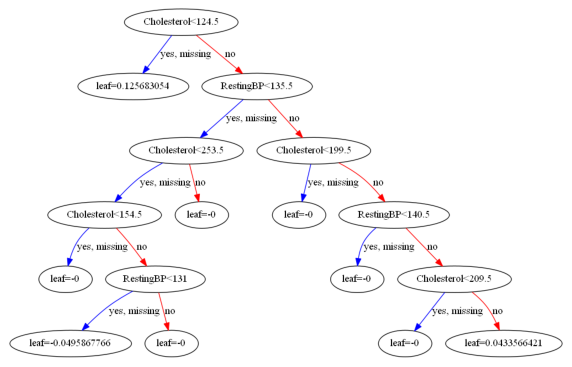

In [104]:
#Visualize Boosting Tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 20]
plt.show()

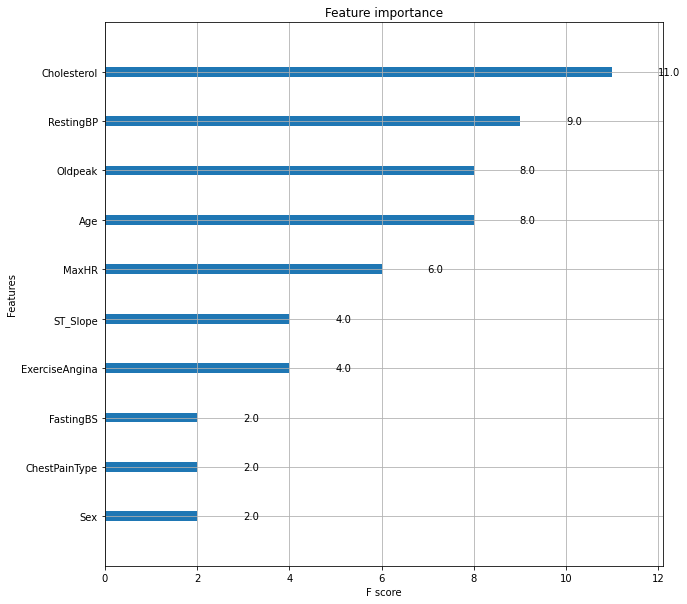

In [106]:
#Visualize Feature Importance
xgb.plot_importance(xg_reg,ylabel='Features' )
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()